In [93]:
#@title Enter your information & "RUN the cell!!"
student_id =  401200482 #@param {type:"integer"}
student_name = "Mohammad Nourbakhsh Marvast" #@param {type:"string"}

print("your student id:", student_id)
print("your name:", student_name)

your student id: 401200482
your name: Mohammad Nourbakhsh Marvast


In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.animation import FuncAnimation
from IPython import display

#تمرین ۱

In [95]:
def function(X,t=0, I=0.3, a = 0.08):
  V= X[0]
  W= X[1]
  x1 =  V - np.power(V,3) - W + I
  x2 = a * ( V + 0.7 - 0.8 * W)
  return [x1,x2]

In [96]:
def jacobian(x):
  v= x[0]
  w= x[1]
  J = [[1 - 3* np.power(v,2), -1],[0.08, -0.064]]
  return np.array(J)

In [97]:
X0 = [1,0]
jacobian(X0)

array([[-2.   , -1.   ],
       [ 0.08 , -0.064]])

In [98]:
def iter_newton(X,function,jacobian,I=0.3, imax = 1e6,tol = 1e-5):
    for i in range(int(imax)):
        J = jacobian(X) # calculate jacobian J = df(X)/dY(X)
        Y = function(X,I=I) # calculate function Y = f(X)
        #print(J,Y)
        dX = np.linalg.solve(J,Y) # solve for increment from JdX = Y

        X -= dX # step X by dX
        if np.linalg.norm(dX)<tol: # break if converged
            #print('converged.')
            break
    return X

In [99]:
X0 = [0,0]
x_ss = iter_newton(X0, function, jacobian,I=0.3,imax = 60, tol= 1e-5)
print(f'steady state: {x_ss}')
print(f' Jacobian at x_ss: {jacobian(x_ss)}')
print(np.linalg.eig(jacobian(x_ss))[0])

steady state: [-0.73187984 -0.0398498 ]
 Jacobian at x_ss: [[-0.60694429 -1.        ]
 [ 0.08       -0.064     ]]
[-0.33547214+0.07939065j -0.33547214-0.07939065j]


In [100]:
def steasy_states_state(X_ss, jacobian):
  states = {}
  for x_ss in X_ss:
    eigenvalues, _= np.linalg.eig(jacobian(x_ss))
    if any(eigenvalues.real>0):
      states[f'[{x_ss[0]}, {x_ss[1]}]']= 'unstable'
    elif all(eigenvalues.real<0):
      states[f'[{x_ss[0]}, {x_ss[1]}]']= 'stable'
    else:
      states[f'[{x_ss[0]}, {x_ss[1]}]']= 'unknown'
  return states

In [101]:
X_ss = [x_ss]
steasy_states_state(X_ss, jacobian)

{'[-0.7318798368391471, -0.03984979604893404]': 'stable'}

In [102]:
def initiate(current):
  x0=np.linspace(-2,2.5,60)
  x1=np.linspace(-2,2.5,60)

  # create a grid
  X0,X1=np.meshgrid(x0,x1)
  # projections of the trajectory tangent vector
  dX0=np.zeros(X0.shape)
  dX1=np.zeros(X1.shape)
  shape1,shape2=X1.shape
  for indexShape1 in range(shape1):
      for indexShape2 in range(shape2):
          dxdtAtX = function([X0[indexShape1,indexShape2],X1[indexShape1,indexShape2]],I= current)
          dX0[indexShape1,indexShape2] = dxdtAtX[0]
          dX1[indexShape1,indexShape2] = dxdtAtX[1]
  return X0, X1, dX0, dX1

<Axes: title={'center': 'Phase Portrait of the system with initial current=1'}, xlabel='V', ylabel='W'>

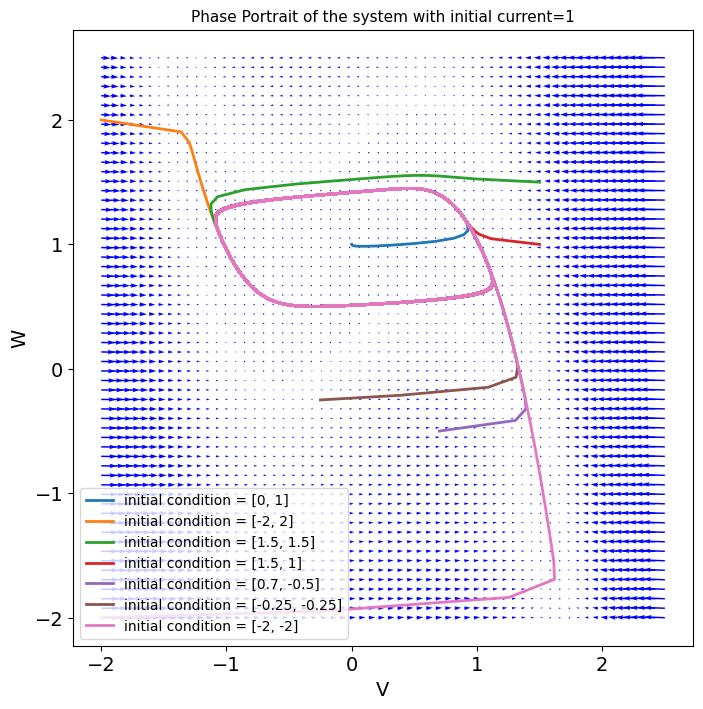

In [103]:
fig, ax = plt.subplots(figsize = (8,8))


def plot(current):
  ax.clear()
  X0, X1, dX0, dX1 = initiate(current)
  # plot the phase portrait
  #ax.quiver(X0,X1,dX0*(1/np.linalg.norm(dX0)),dX1*(1/np.linalg.norm(dX1)),color='b')
  ax.quiver(X0,X1,dX0,dX1,color='b')
  # insert the title
  ax.set_title(f'Phase Portrait of the system with initial current={current}', fontsize=11)
  # adjust the axis limits
  #ax.set_xlim(-1,1)
  #ax.set_ylim(-1,1)

  for init in [[0,1],[-2,2],[1.5,1.5],[1.5,1],[0.7,-0.5],[-0.25,-0.25],[-2,-2]]:
    initialState = np.array(init)
    simulationTime = np.linspace(0,500,1000)
    # generate the state-space trajectory
    solutionState = odeint(function,initialState,simulationTime, args=(current, ))
    # add the state trajectory plot
    ax.plot(solutionState[:,0], solutionState[:,1],linewidth=2, label= f'initial condition = {init}')
  #print(solutionState[-1,0], solutionState[-1,1])
  # set the axis labels
  ax.set_xlabel('V',fontsize=14)
  ax.set_ylabel('W',fontsize=14)
  #ax.set_xlim((-2,3))
  #ax.set_ylim((-2,3))
  # adjust the font size of x and y axes
  ax.tick_params(axis='both', which='major', labelsize=14)
  ax.legend()
  return ax

plot(current= 1)

In [104]:
# Create a list of values for p
I_values = np.linspace(0, 3, 50)
anim = FuncAnimation(fig, plot, frames=I_values, interval=50)
#plt.show()
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)

# good practice to close the plt object.
plt.close()

In [105]:
def V_nullclines(v, current):
  return v-np.power(v,3) + current


def W_nullclines(v):
  return (10* v + 7)/8

<Axes: title={'center': 'current: 0.3 - stability of steady stete: stable'}>

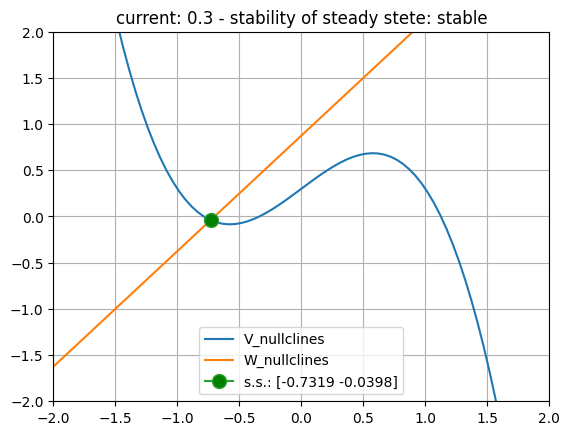

In [106]:
fig, ax = plt.subplots()
def nulclines(current):
  ax.clear()

  v = np.linspace(-5,10, 300)
  ax.plot(v, V_nullclines(v, current), label= f"V_nullclines")
  ax.plot(v, W_nullclines(v), label= "W_nullclines")

  X0= [0,0]
  v_ss, w_ss = iter_newton(X0, function, jacobian, I=current,imax = 60, tol= 1e-3)
  ax.plot(v_ss, w_ss, marker="o", label =f's.s.: {np.round([v_ss, w_ss],4)}' ,markersize=10, markerfacecolor="green")

  state = steasy_states_state([[v_ss, w_ss]], jacobian)
  ax.set_title(f'current: {np.round(current,4)} - stability of steady stete: {state[list(state.keys())[0]]}')

  ax.set_ylim(-2,2)
  ax.set_xlim(-2,2)
  ax.grid(True)
  ax.legend()
  return ax

nulclines(0.3)

In [107]:
# Create a list of values for p
I_values = np.linspace(0, 2, 100)
anim = FuncAnimation(fig, nulclines, frames=I_values, interval=50)
#plt.show()
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)

# good practice to close the plt object.
plt.close()

<Axes: xlabel='current', ylabel='V_ss'>

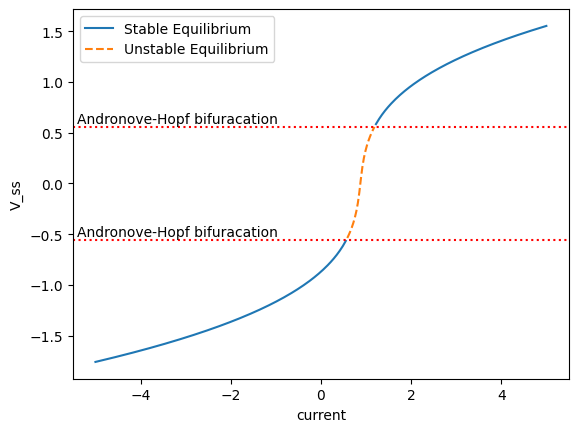

In [108]:
def bifurcation():
  fig, ax = plt.subplots()

  I = np.linspace(-5,5, 300)
  I_s = []
  I_u = []
  V_sss = []
  V_uss = []
  W_sss = []
  W_uss = []
  for current in I:
    v_ss, w_ss = iter_newton(X0, function, jacobian, I=current,imax = 60, tol= 1e-3)
    state = steasy_states_state([[v_ss, w_ss]], jacobian)
    if ( state[list(state.keys())[0]]== 'stable'):
      V_sss.append(v_ss)
      W_sss.append(w_ss)
      V_uss.append(np.nan)
      W_uss.append(np.nan)

    else:
      V_uss.append(v_ss)
      W_uss.append(w_ss)
      V_sss.append(np.nan)
      W_sss.append(np.nan)

  ax.plot(I, V_sss, label= 'Stable Equilibrium')
  ax.plot(I, V_uss, '--', label= 'Unstable Equilibrium')
  ax.axhline(y = -0.56, color = 'r', linestyle = 'dotted')
  ax.axhline(y =  0.56, color = 'r', linestyle = 'dotted')
  ax.text(-5.4,0.59, 'Andronove-Hopf bifuracation')
  ax.text(-5.4,-0.52, 'Andronove-Hopf bifuracation')
  ax.set_xlabel('current')
  ax.set_ylabel('V_ss')
  #ax.set_xlim((0,1))
  ax.legend()

  return ax

bifurcation()


# تمرین ۲

In [109]:
def f(x,t=0, a = 0):
  dxdt = np.power(x,2) - a
  return dxdt

In [110]:
def equilibrium(a):
  return np.sqrt(a), -np.sqrt(a)

<Axes: xlabel='a', ylabel='x_ss'>

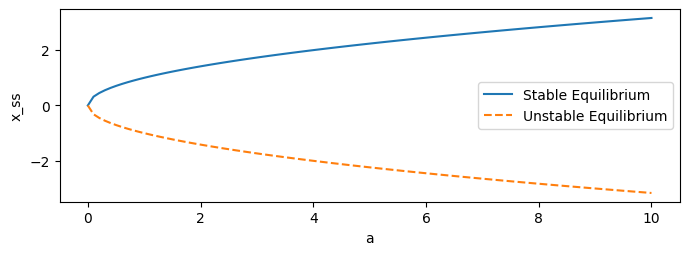

In [111]:
def bifurcation():
  a = np.linspace(0,10, 100)
  x, y = equilibrium(a)
  fig, ax = plt.subplots(figsize = (8,2.5))
  ax.plot(a,x,label= 'Stable Equilibrium')
  ax.plot(a,y, '--', label= 'Unstable Equilibrium')

  ax.set_xlabel('a')
  ax.set_ylabel('x_ss')
  ax.legend()

  return ax

bifurcation()

#تمرین ۴

In [112]:
def perceptron(X, W1, W2, theta1, theta2):
  X = np.abs(X)
  X1 = np.heaviside(X @ W1 - theta1, 1)
  X2 = np.heaviside(X1 @ W2 - theta2, 1)

  return X2[0,0]==1


In [113]:
W1 = np.array([[-3, 0.5, 1, 0],[-1,-1,0,1]])
W2 = np.array([[1],[1],[1],[1]])
theta1 = np.array([-9,-2,0,0])
theta2 = 4

X = []
Y = []
for x in np.linspace(-3,3,100):
  for y in np.linspace(-3,3,100):
    if perceptron([[x,y]], W1, W2, theta1, theta2):
      X.append(x)
      Y.append(y)

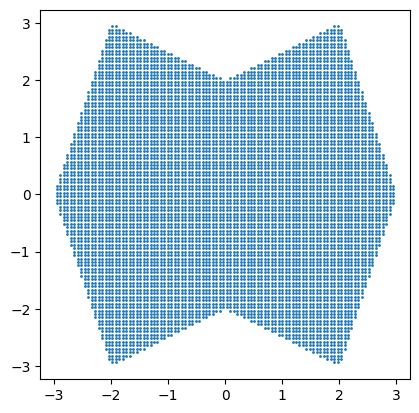

In [114]:
plt.scatter(X,Y, s= 1)
plt.axis('square')
plt.show()